<a href="https://colab.research.google.com/github/spr-att/spr-att.github.io/blob/main/AMLProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
#read in data
data = pd.read_csv('/content/drive/MyDrive/AML/safe_driver_prediction.csv')

In [ ]:
#check the shape
data.shape

(595212, 59)

In [ ]:
#make sure there are no NA's
data.dropna()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [ ]:
# how many class 0 and class 1 observations are there?
data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
#make a df of just class 0
class_0 = pd.read_csv('/content/drive/MyDrive/AML/safe_driver_prediction.csv')
class_0.dropna()
class_0.drop(class_0.index[class_0['target'] == 1], inplace=True)
class_0

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [ ]:
#make a df of just class 1
class_1 = pd.read_csv('/content/drive/MyDrive/AML/safe_driver_prediction.csv')
class_1.dropna()
class_1.drop(class_1.index[class_1['target'] == 0], inplace=True)
class_1

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
19,64,1,0,1,2,1,0,1,0,0,...,10,3,1,11,0,1,1,0,1,0
28,84,1,0,2,0,1,4,1,0,0,...,3,2,0,8,0,1,1,0,0,0
39,107,1,2,1,3,1,0,0,0,1,...,6,0,8,14,0,1,0,1,0,0
41,110,1,5,2,1,0,0,0,0,1,...,5,2,0,7,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595006,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
595046,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
595099,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
595113,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


In [ ]:
#check class 0 shape
class_0.shape

(573518, 59)

In [ ]:
#check class 1 shape
class_1.shape

(21694, 59)

In [ ]:
#subset class 0 to just 100k samples without replacement and with random state = 123
class0_subset = class_0.sample(n=100000, replace=False, random_state = 123)
class0_subset.shape

(100000, 59)

In [ ]:
#concatenate the class 0 subset and class 1 dataframes
final_data = pd.concat([class0_subset, class_1], axis=0)
final_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
379320,947975,0,1,2,1,0,0,1,0,0,...,4,2,5,5,0,1,0,0,0,0
33180,83183,0,1,1,4,0,0,0,1,0,...,3,0,4,14,0,1,1,0,0,0
60616,151937,0,0,1,6,0,0,1,0,0,...,7,1,3,4,0,0,1,0,1,0
254795,636826,0,0,1,3,0,0,1,0,0,...,3,0,2,9,0,1,1,0,0,0
372085,929986,0,0,1,5,1,0,0,0,0,...,6,3,2,9,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595006,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
595046,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
595099,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
595113,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


In [ ]:
#set the input features = x and the output variable = y
x = final_data.loc[:,'ps_ind_01':'ps_calc_20_bin'].values
y = final_data['target'].values

In [ ]:
#check the shape of y
y.shape

(121694,)

In [ ]:
#check the shape of x
x.shape

(121694, 57)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from scipy import stats
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split as tts

In [ ]:
def val_func(classifier, x, y, n_splits = 10, std = True, shuffle = True, random_state = 123, title = 'ROC Curve'):
  cv = StratifiedKFold(n_splits=n_splits, shuffle = shuffle, random_state=random_state)

  tprs = []
  aucs = []
c
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots(figsize=(10,8))
  for i, (train, test) in enumerate(cv.split(x, y)):

    if std is True:
      scaler = StandardScaler()
      x[train] = scaler.fit_transform(x[train])
      x[test] = scaler.transform(x[test])

    classifier.fit(x[train], y[train])
    viz = plot_roc_curve(classifier, x[test], y[test], name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    report = classification_report(y,classifier.predict(x),output_dict=True)
    rec.append(report['1']['recall'])
    prec.append(report['1']['precision'])

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title=title)
  ax.legend(loc="lower right")

  plt.show()
  print('The average recall for class 1: ' + str(np.mean(rec)))
  print('The average precision for class 1: ' + str(np.mean(prec)))

# ROC Curves, Recall, and Precision Values

In [ ]:
#Logistic Regression

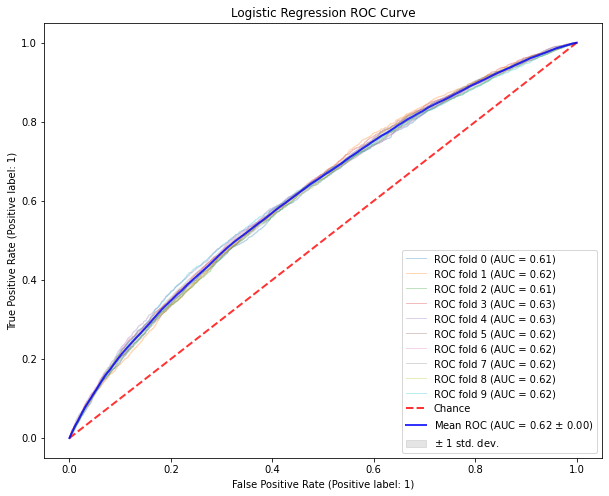

The average recall for class 1: 0.005619065179312252
The average precision for class 1: 0.40980362509462964


In [ ]:
classifier = LogisticRegression(solver='lbfgs', max_iter=100000)
val_func(classifier, x, y, title = 'Logistic Regression ROC Curve')

In [ ]:
#Random Forest

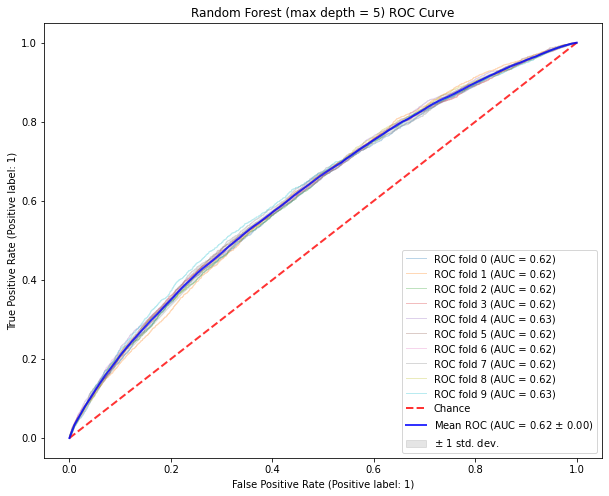

The average recall for class 1: 0.0006591684336682954
The average precision for class 1: 0.986104826546003


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=5)
val_func(classifier, x, y, std = False, title = 'Random Forest (max depth = 5) ROC Curve')

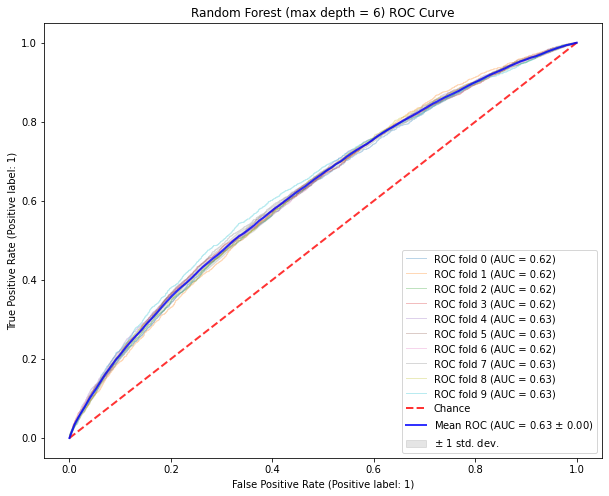

The average recall for class 1: 0.0011293445192219046
The average precision for class 1: 0.979055829228243


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=6)
val_func(classifier, x, y, std = False, title = 'Random Forest (max depth = 6) ROC Curve')

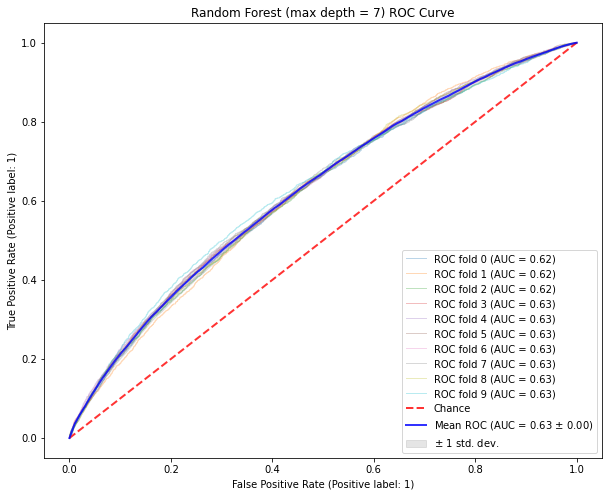

The average recall for class 1: 0.00134138471466765
The average precision for class 1: 0.9906060606060606


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=7)
val_func(classifier, x, y, std = False, title = 'Random Forest (max depth = 7) ROC Curve')

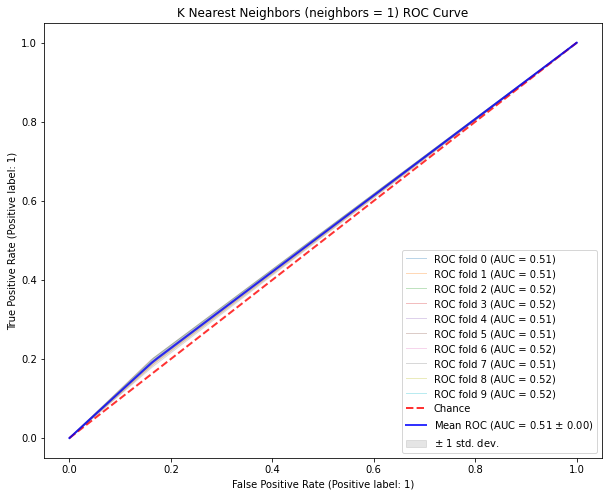

The average recall for class 1: 0.919387849174887
The average precision for class 1: 0.9236336315023257


In [ ]:
classifier = neighbors.KNeighborsClassifier(n_neighbors = 1)
val_func(classifier, x, y, title = 'K Nearest Neighbors (neighbors = 1) ROC Curve')

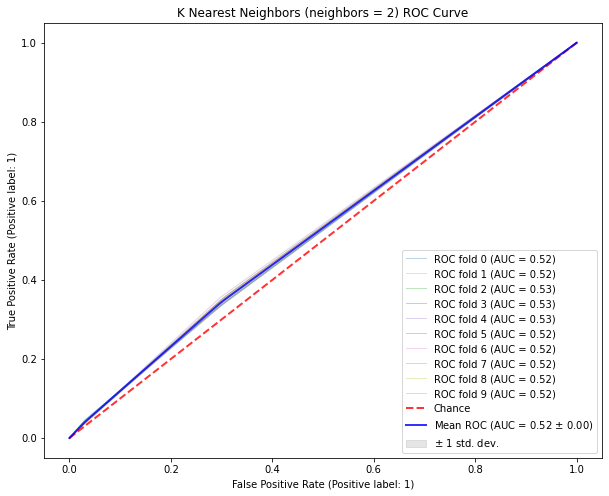

The average recall for class 1: 0.17827509910574355
The average precision for class 1: 0.9272229453012926


In [ ]:
classifier = neighbors.KNeighborsClassifier(n_neighbors = 2)
val_func(classifier, x, y, title = 'K Nearest Neighbors (neighbors = 2) ROC Curve')

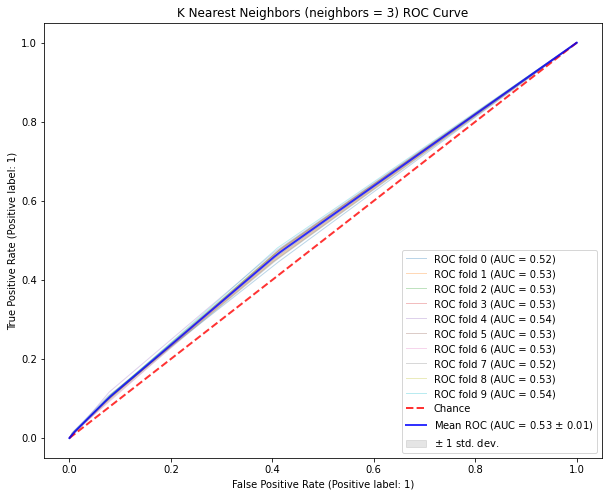

The average recall for class 1: 0.3217525583110537
The average precision for class 1: 0.666085299125436


In [ ]:
classifier = neighbors.KNeighborsClassifier(n_neighbors = 3)
val_func(classifier, x, y, title = 'K Nearest Neighbors (neighbors = 3) ROC Curve')

In [ ]:
#SVM

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

--2022-04-05 03:02:07--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2022-04-05 03:02:08--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?iAYuS98xWNAECXXFopuYlPQFu4oMasn601bcHFpFGnAyVk50jEqLv_ba3BjiKhZGpHRBz32EVJaIuukzke32TH-fuK0WU

In [ ]:
!ls

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb    drive
cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb.1  sample_data


In [ ]:
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

(Reading database ... 165522 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1704-9-0-local (9.0.176-1) over (9.0.176-1) ...
Setting up cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...


In [ ]:
!ls /var/cuda-repo-9-0-local | grep .pub

7fa2af80.pub


In [ ]:
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub

OK


In [ ]:
!apt-get update

Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu

In [ ]:
!sudo apt-get install cuda-9.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-9-0' for regex 'cuda-9.0'
Note, selecting 'libcuda-9.0-1' for regex 'cuda-9.0'
cuda-9-0 is already the newest version (9.0.176-1).
0 upgraded, 0 newly installed, 0 to remove and 94 not upgraded.


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [ ]:
!pip install thundersvm
from thundersvm import SVC

In [ ]:
model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
scaler = StandardScaler()
xs = scaler.fit_transform(x)
model.fit(xs, y)

SVC(C=1, class_weight={}, gamma=0.1, probability=True)

In [ ]:
y_pred_proba = model.predict_proba(xs)[:,1]
y_pred_proba

array([0.09894066, 0.09911534, 0.09892188, ..., 0.8519702 , 0.749091  ,
       0.7921492 ], dtype=float32)

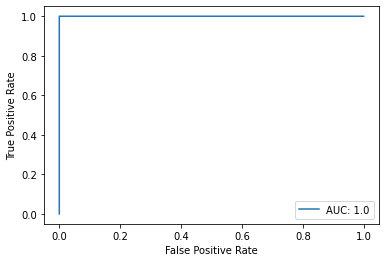

In [ ]:
fpr, tpr, _ = roc_curve(y, y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)

plt.plot(fpr, tpr, label = 'AUC: ' + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
report = classification_report(y,model.predict(xs),output_dict=True)
print('The average recall for class 1: ' + str(report['1']['recall']))
print('The average precision for class 1: ' + str(report['1']['precision']))

The average recall for class 1: 0.9916566792661565
The average precision for class 1: 1.0


From running the models its clear to see that the best models are SVM and K Nearest Neighbors (neighbors = 1). This is shown by the recall and precision values that are higher than any of the other models. That being said the ROC curves for the K Nearest Neighbors were all not much better than random chance.